In [72]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage import exposure
from skimage.feature import hog
from skimage.filters import sobel

# Change to match data filepath on local
base_fp = '/home/sysung98/MIDS/W281/final_project/rendered_256x256'

In [73]:
def hog_sobel(sketch_img_fp):
    sketch_img = cv2.imread(sketch_img_fp)
    gray = cv2.cvtColor(sketch_img, cv2.COLOR_BGR2GRAY)

    fd, hog_image = hog(
        gray, 
        orientations = 8, 
        pixels_per_cell = (16, 16),
        cells_per_block = (1, 1), 
        visualize = True
    )
    
    min_value = np.min(hog_image)
    max_value = np.max(hog_image)
    hog_image = exposure.rescale_intensity(
        hog_image, 
        in_range=(min_value, max_value), 
        out_range = (0, 1)
    )
    
    return hog_image, sobel(gray)

def get_irl_photo_from_sketch(sketch_img_fp):
    fp_split = sketch_img_fp.split('/')
    picture = fp_split[-1].split('-')[0]
    category = fp_split[-2]
    augmentation = 'tx_000100000000' if fp_split[-3] == 'tx_000100000000' else 'tx_000000000000'
 
    photo_img_fp = fp_split[:-4] + ['photo', augmentation, category, picture + '.jpg']
    return '/'.join(photo_img_fp)
    

def plot_img_hog(sketch_img_fp):

    photo_img_fp = get_irl_photo_from_sketch(sketch_img_fp)
    photo_img = cv2.imread(photo_img_fp)

    sketch_img = cv2.imread(sketch_img_fp)
    hog_img = hog_sobel(sketch_img_fp)[0]

    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title('/'.join(photo_img_fp.split('/')[-2:]))
    plt.imshow(photo_img, cmap='gray', vmin=0, vmax=1)

    plt.subplot(1,3,2)
    plt.title('/'.join(sketch_img_fp.split('/')[-2:]))
    plt.imshow(sketch_img, cmap='gray', vmin=0, vmax=1)

    plt.subplot(1,3,3)
    plt.title('HOG Descriptor')
    plt.imshow(hog_img, cmap='gray', vmin=0, vmax=1)

def plot_imgs_per_category(base_fp, augmentation):
    cat_sketch_img_dict = get_category_to_sketch_img_dict(base_fp, augmentation)

    cat = list(cat_sketch_img_dict.keys())
    img_ct = list(map(lambda x: len(x), cat_sketch_img_dict.values()))

    cat_sketch_img_pd = pd.DataFrame({'img_ct': img_ct}, index=cat).sort_index()

    fig, ax = plt.subplots(figsize=(20,5))
    cat_sketch_img_pd['img_ct'].plot(kind='bar', linewidth=5)
    plt.title("Number of Images per Category")
    ax.set_yticks([500, 600, 700, 800])
    plt.ylim(500, 800)
    plt.tick_params(axis='x', which='major', labelsize=9)
    plt.xticks(rotation = 90)
    plt.show()

def get_all_sketch_img_fp(base_fp, augmentation):
    sketch_img_fp = base_fp + '/256x256/sketch/' + augmentation
    img_fp_list = []


    for categories in os.listdir(sketch_img_fp):
        category_fp = '/'.join([sketch_img_fp, categories])

        for img in os.listdir(category_fp):
            img_fp  = category_fp + '/' + img
            img_fp_list.append(img_fp)

    return img_fp_list

def get_category_to_sketch_img_dict(base_fp, augmentation):
    cat_sketch_img_dict = {}
    for i in get_all_sketch_img_fp(base_fp, augmentation):
        split_fp = i.split('/')
        category = split_fp[-2]
        img_name = split_fp[-1]

        if category not in cat_sketch_img_dict:
            cat_sketch_img_dict[category] = [img_name]
        else:
            cat_sketch_img_dict[category].append(img_name)
    return cat_sketch_img_dict

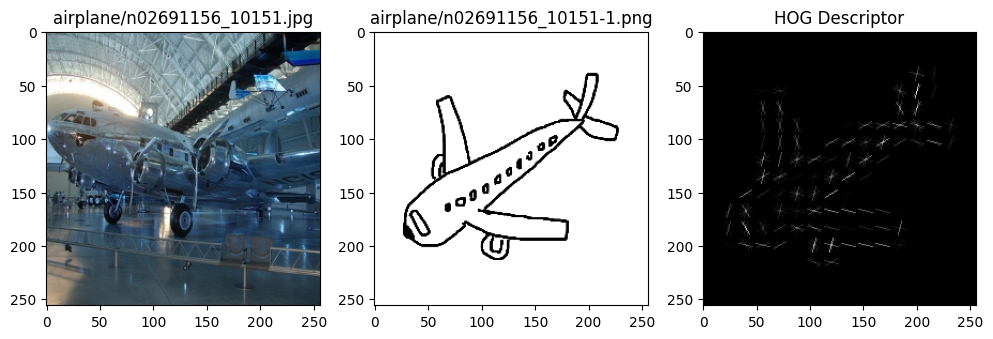

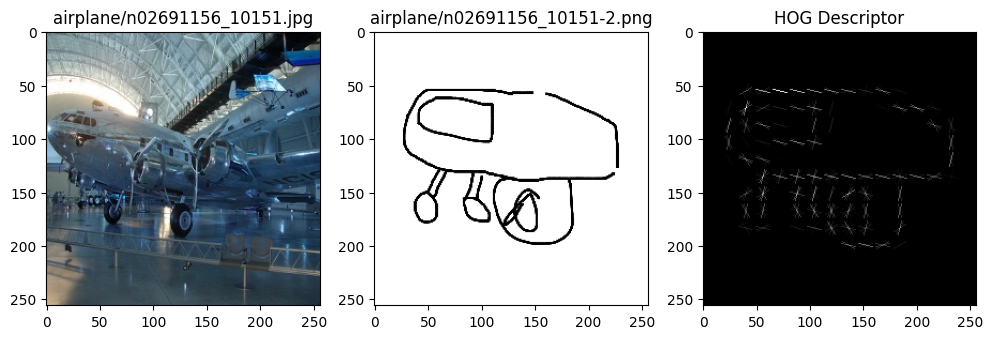

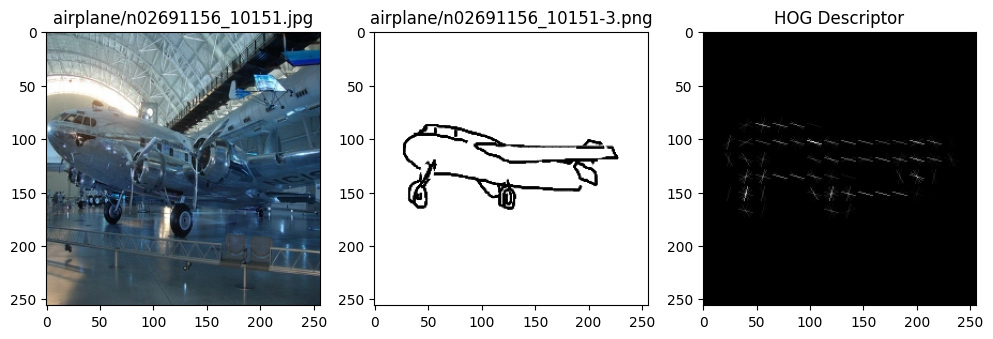

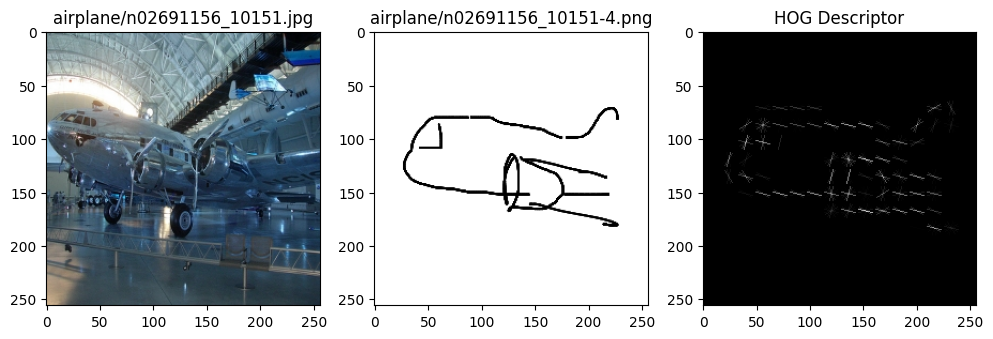

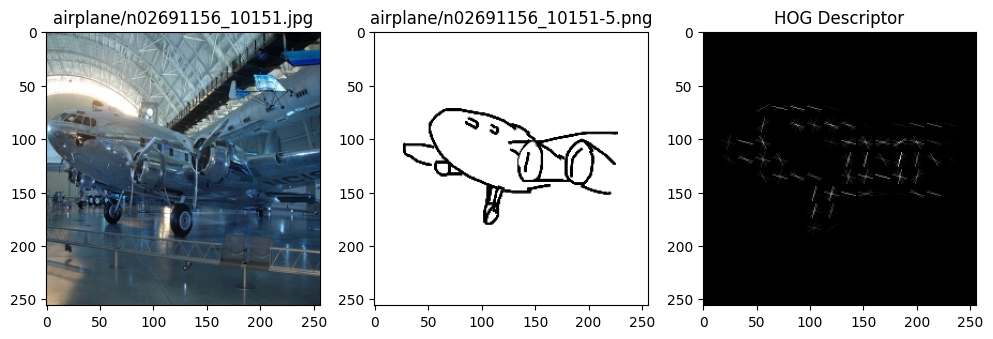

In [74]:
augmentation = 'tx_000100000000'
img_fp = sorted(get_all_sketch_img_fp(base_fp, augmentation))

for i in img_fp[:5]:
    # print(i)
    plot_img_hog(i)

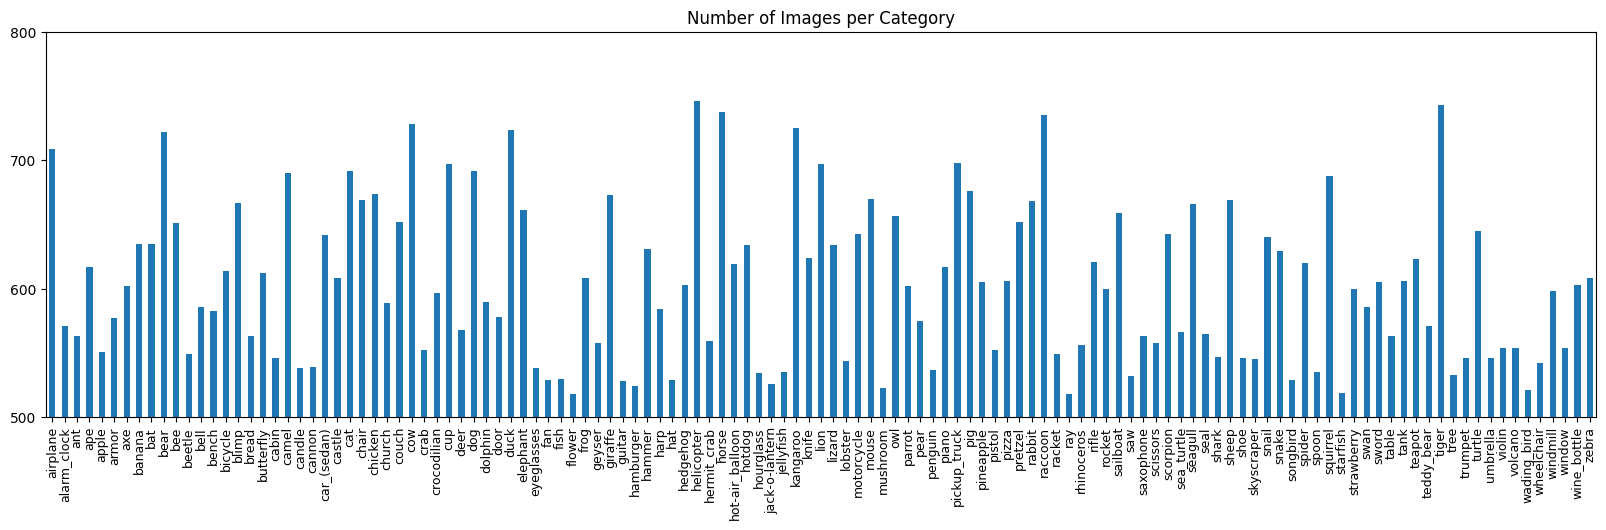

In [75]:
plot_imgs_per_category(base_fp, augmentation)